In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import matplotlib as mpl

import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

In [2]:
def interpolation_meth1(data, npts = 200, ngridx = 100, ngridy = 200, xmin=-30.1, xmax=30.1, ymin=-30.1, ymax=30.1,  ):
    x=[]
    y=[]
    z=[]

    for r in range(0,60):
        for i in range(0,72):
            x.append(r/2*np.cos(theta[i]))
            #print x
            y.append(r/2*np.sin(theta[i]))
            z.append(data[r,i])
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)


    # -----------------------
    # Interpolation on a grid
    # -----------------------
    # A contour plot of irregularly spaced data coordinates
    # via interpolation on a grid.

    # Create grid values first.
    xi = np.linspace(xmin, xmax, ngridx)
    yi = np.linspace(xmin, xmax, ngridy)

    # Perform linear interpolation of the data (x,y)
    # on a grid defined by (xi,yi)
    triang = tri.Triangulation(x, y)
    interpolator = tri.LinearTriInterpolator(triang, z)
    Xi, Yi = np.meshgrid(xi, yi)
    zi = interpolator(Xi, Yi)

    # Note that scipy.interpolate provides means to interpolate data on a grid
    # as well. The following would be an alternative to the four lines above:
    #from scipy.interpolate import griddata
    #zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='linear')


    return xi, yi, zi

# Load data

In [3]:
DNA_KIO_rad_angle=np.loadtxt('./canion_K500mM/KIO.ra')

/home/tb/secruz/.local/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


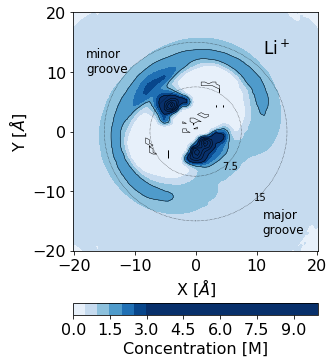

CPU times: user 211 ms, sys: 1.94 ms, total: 213 ms
Wall time: 212 ms


In [15]:
%%time

theta = np.linspace(np.pi/4.,np.pi/4+2.*math.pi, 73)
rad=np.linspace(0.5,30., 60)

#CMAP="RdBu_r"
CMAP="Blues"
NLines=7
Nlevels=20

Xmin=-20.1
Ymin=-20.1
XMax=20.1
YMax=20.1

VMax=3.
VMin=0.0

radii=[7.5, 15]
plt.rcParams['font.size'] = 16.0
fig=plt.figure(figsize=(4, 5))
plt.subplots_adjust(top=0.95, bottom=0.0, left=0.1, right=0.95, hspace=0.05,wspace=0.25)
 
    
for i in range(5, 9):
    
    ax1=fig.add_subplot(1,1,1)
        
    if i==5:
        ax1.set_xlim([Xmin, XMax])
        ax1.set_ylim([Ymin, YMax])
        ax1.set_xlabel('X [$\AA$]')
        ax1.set_ylabel('Y [$\AA$]')
        ax1.text(x=-18, y=10, s='minor\ngroove', color='k', fontsize=12)
        ax1.text(x=11, y=-17, s='major\ngroove', color='k', fontsize=12)
        
        ax1.text(x=11, y=13, s=r'Li$^+$', color='k', fontsize=17)
        
        xi,yi,zi= interpolation_meth1(DNA_KIO_rad_angle, )
        ax1.contour(xi, yi, zi,NLines, linewidths=0.5, colors='k', vmin=VMin, vmax=VMax)
        cntr1 = ax1.contourf(xi, yi, zi, Nlevels, cmap=CMAP, vmin=VMin, vmax=VMax)
        fig.colorbar(cntr1, ax=ax1, orientation='horizontal', spacing='proportional', label='Concentration [M]')
        
        for rr in radii:
            circle = plt.Circle((0,0),rr,fill=False, color='k', linestyle=':', linewidth=0.5,)
            ax1.add_artist(circle)
            ax1.text(x=-1+rr*np.sin(math.pi/4), y=-1+rr*np.sin(-math.pi/4), s=str(rr), rotation=math.pi/4,
                     color='k', fontsize=10)
    

            #ax1.text(x=9, y=15, s='dsRNA', color='white', fontsize=11)
            
plt.show()
